In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

2023-04-09 02:59:06.378469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 02:59:06.673488: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-09 02:59:06.770790: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-09 02:59:07.795435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Basic workflow of an ML problem:-
<ul>
    <li>Obtain training data</li>
    <li>Define the model</li>
    <li>Define the loss function</li>
    <li>Run through the training data and calculate loss</li>
    <li>Calculate gradients of the loss and use optimizer to adjust the variables to fit the data</li>
    <li>Evaluate the results</li>

In [2]:
# Actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

# Generate noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])


y = f(x) + noise

2023-04-09 02:59:10.444391: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-09 02:59:10.670507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-09 02:59:10.670654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-09 02:59:10.681540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

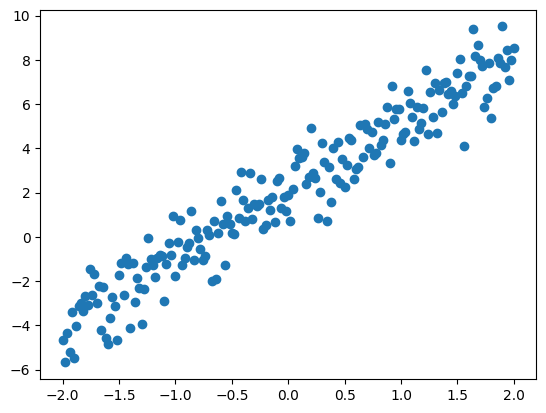

In [3]:
plt.scatter(x, y)
plt.show()

# Define the model

Use tf.Variable to repreent the weights and biases and tf.Module to encapsulate for easuer computation and saving

In [4]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)       # Initialized as 5 only for this example
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return x * self.w + self.b
    
model = MyModel()

print("Model variables: ", model.variables)
print(model(3.0).numpy() == 15)

Model variables:  (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)
True


In [5]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

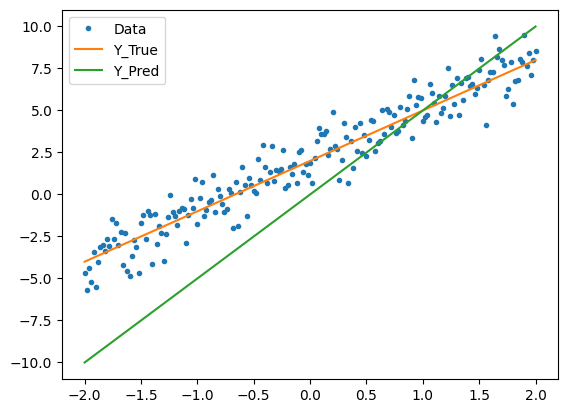

Loss:  10.436473


In [6]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Y_True")
plt.plot(x, model(x), label="Y_Pred")
plt.legend()
plt.show()

print("Loss: ", loss(y, model(x)).numpy())

# Define a training loop

Training loop does the following tasks repeatedly in order :-
<ul>
<li>Sending a batch of inputs through the model to get outputs</li>
<li>Calculating the loss</li>
<li>Using gradient tape to find the gradients</li>
<li>Optimizing the variables with those gradients</li>

In [7]:
def train(model, x, y, learning_rate):

    with tf.GradientTape() as tape:
        current_loss = loss(y, model(x))

    # Find gradients of loss wrt weights and biases
    dw, db = tape.gradient(current_loss, [model.w, model.b])

    # Subtract the gradient scaled my learning rate and assign to variable
    model.w.assign_sub(dw * learning_rate)
    model.b.assign_sub(db * learning_rate)

In [8]:
model = MyModel()

# To store all the weights and biases over time
weights = []
biases = []
epochs = range(10)

# Define a training loop
def report(model, loss):
    return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f},\
        loss = {loss.numpy():2.5f}"

def training_loop(model, x, y):
    
    for epoch in epochs:
        train(model, x, y, 0.1)
        weights.append(model.w.numpy())
        biases.append(model.b.numpy())
        current_loss = loss(y, model(x))

        print(f"Epoch {epoch:2d}: ")
        print("    ", report(model, current_loss))

In [9]:
current_loss = loss(y, model(x))

print("Starting")
print("", report(model, current_loss))

training_loop(model, x, y)

Starting
 W = 5.00, b = 0.00,        loss = 10.43647
Epoch  0: 
     W = 4.48, b = 0.42,        loss = 6.50201
Epoch  1: 
     W = 4.10, b = 0.75,        loss = 4.23362
Epoch  2: 
     W = 3.82, b = 1.02,        loss = 2.91514
Epoch  3: 
     W = 3.62, b = 1.24,        loss = 2.14247
Epoch  4: 
     W = 3.47, b = 1.41,        loss = 1.68596
Epoch  5: 
     W = 3.36, b = 1.55,        loss = 1.41407
Epoch  6: 
     W = 3.28, b = 1.66,        loss = 1.25089
Epoch  7: 
     W = 3.22, b = 1.74,        loss = 1.15224
Epoch  8: 
     W = 3.18, b = 1.81,        loss = 1.09218
Epoch  9: 
     W = 3.15, b = 1.87,        loss = 1.05540


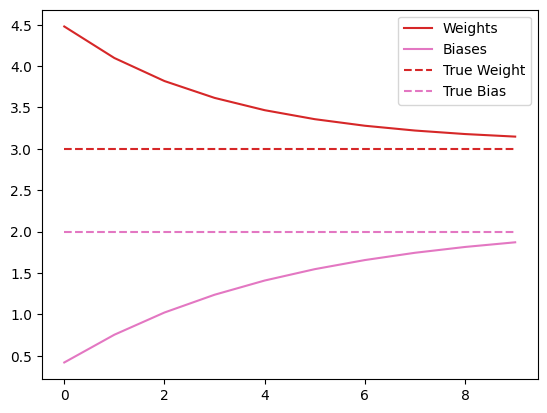

In [10]:
# Plot the weights and biases
plt.plot(epochs, weights, label="Weights", color=colors[3])
plt.plot(epochs, biases, label="Biases", color=colors[6])
plt.plot(epochs, [TRUE_W] * len(epochs), '--', label="True Weight", color=colors[3])
plt.plot(epochs, [TRUE_B] * len(epochs), '--', label="True Bias", color=colors[6])
plt.legend()
plt.show()

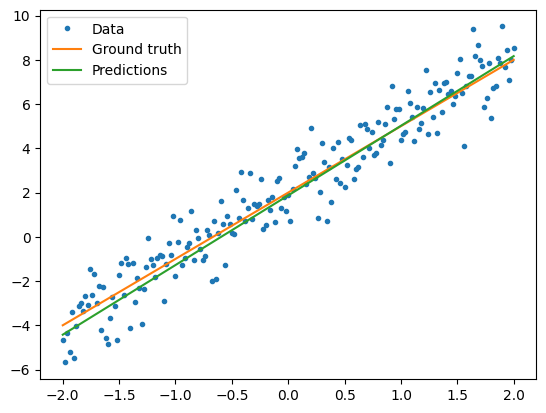

Current loss: 1.055398


In [11]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

The same solution using Keras

In [13]:
class MyModelKeras(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def call(self, x):
        return self.w * x + self.b

keras_model = MyModelKeras()

# Reuse the training loop with a Keras model
training_loop(keras_model, x, y)

# You can also save a checkpoint using Keras's built-in support
keras_model.save_weights("my_checkpoint")

Epoch  0: 
     W = 4.48, b = 0.42,        loss = 6.50201
Epoch  1: 
     W = 4.10, b = 0.75,        loss = 4.23362
Epoch  2: 
     W = 3.82, b = 1.02,        loss = 2.91514
Epoch  3: 
     W = 3.62, b = 1.24,        loss = 2.14247
Epoch  4: 
     W = 3.47, b = 1.41,        loss = 1.68596
Epoch  5: 
     W = 3.36, b = 1.55,        loss = 1.41407
Epoch  6: 
     W = 3.28, b = 1.66,        loss = 1.25089
Epoch  7: 
     W = 3.22, b = 1.74,        loss = 1.15224
Epoch  8: 
     W = 3.18, b = 1.81,        loss = 1.09218
Epoch  9: 
     W = 3.15, b = 1.87,        loss = 1.05540


In [14]:
keras_model = MyModelKeras()

# compile sets the training parameters
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly=False,

    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    loss=tf.keras.losses.mean_squared_error,
)


In [15]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

201
Epoch 1/10
1/1 [==============================] - 0s 172ms/step - loss: 10.4365
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 6.5020
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 4.2336
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 2.9151
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 2.1425
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 1.6860
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 1.4141
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 1.2509
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 1.1522
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 1.0922
